# HIGH FREQUENCY WORDS USING NLTK
## Required Packages

In [10]:
import nltk
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

## Corpus

In [11]:

with open('Datasets/finalproj_corpus.txt', 'r', encoding='utf-8') as f:
    for line in f:
        print(line[0:1000])


US News – Top national stories and latest headlines - CNN Open Menu US Crime + Justice Energy + Environment More Extreme Weather Space + Science Audio Search CNN Crime + Justice Energy + Environment Extreme Weather Space + Science Search Audio Edition US International Arabic Español Edition US International Arabic Español US Crime + Justice Energy + Environment Extreme Weather Space + Science World Africa Americas Asia Australia China Europe India Middle East United Kingdom Politics The Biden Presidency Facts First US Elections Business Markets Tech Media Success Perspectives Videos Opinion Political Op-Eds Social Commentary Health Life, But Better Fitness Food Sleep Mindfulness Relationships Entertainment Stars Screen Binge Culture Media Tech Innovate Gadget Foreseeable Future Mission: Ahead Upstarts Work Transformed Innovative Cities Style Arts Design Fashion Architecture Luxury Beauty Video Travel Destinations Food and Drink Stay News Videos Sports Pro Football College Football Bask

## Data Preprocessing
### Cleaning

In [12]:
import re
line = re.sub(r'[^\w\s]', '',line).lower() # Block-not this characters: words + spaces-Block
print(line[0:1000])


      quotes displayed in realtime or delayed by at least 15 minutes market data provided by factset  powered and implemented by factset digital solutions  legal statement  mutual fund and etf data provided by refinitiv lipper  facebook twitter instagram rss email opinion fox news digital opinion 15 hours ago the nsba addressed joe biden in a letter expressing american public schools are under an immediate threat due to mask mandates crt gender ideology and more ap opinion 8 hours ago the medicare for all act of 2022 which i have just introduced with 15 cosponsors would provide comprehensive health care coverage to every man woman and child in our country reutersscott audettefile photo opinion 10 hours ago big business is no friend to conservativesthats been clear for years and its increasingly no friend to america 3 hours ago now more than ever police should know that american politicians have their backs just as they have ours 8 hours ago the medicare for all act of 2022 which i have

### Tokenization

In [15]:
nltk.download("punkt")
nltk.download("wordnet")
txt_words = nltk.word_tokenize(line)
#txt_words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Stopwords

In [16]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# tokenized and clean str
# remove stop words

corpus_final = []

In [18]:
for i in txt_words:
    if i not in stop_words:
        corpus_final.append(i)
        corpus_final.append(" ")

In [19]:
"".join(corpus_final[0:100])

'quotes displayed realtime delayed least 15 minutes market data provided factset powered implemented factset digital solutions legal statement mutual fund etf data provided refinitiv lipper facebook twitter instagram rss email opinion fox news digital opinion 15 hours ago nsba addressed joe biden letter expressing american public schools immediate threat due '

### Stemming

In [15]:
# # from nltk.stem import PorterStemmer
#
# stemmer = PorterStemmer()

In [ ]:
# for word in corpus_final:
#     print(stemmer.stem(word))

### Lemmatization

In [17]:
# lemmatizer  = WordNetLemmatizer()

In [ ]:
# for word in corpus_final:
#     print(lemmatizer.lemmatize(word))

## Frequency Words
### Word Counter

In [20]:
from collections import Counter

word_counter = Counter(corpus_final)


### Unique Words

How Many Unique words are in the corpus?

In [21]:
unique_words = len(set(word_counter))

In [22]:
print(unique_words)

552


### Most Common Words

In [27]:
most_common_words = word_counter.most_common()[:200]
most_common_words[0:20]

[(' ', 941),
 ('ago', 46),
 ('days', 21),
 ('news', 15),
 ('hours', 15),
 ('fox', 12),
 ('day', 11),
 ('opinion', 9),
 ('3', 9),
 ('1', 8),
 ('15', 7),
 ('health', 7),
 ('2', 7),
 ('gutfeld', 6),
 ('tucker', 6),
 ('carlson', 6),
 ('v', 6),
 ('american', 5),
 ('us', 5),
 ('justice', 5)]

## Plots

Once we have the frequency distribution in a counter we can use matplotlib to plot the frequency in log axis to check the shape of the distribution.

This graph is used usually to compare different datasets -
Flatter distribution =  larger vocabulary
Peak Distribution = restricted vocabulary (focused topic or specialized language)

### Plot 1 - Frequency

In [28]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Word Rank')

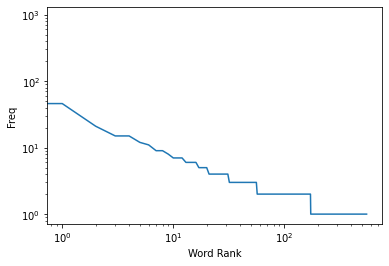

In [29]:
sorter_word_counts = sorted(list(word_counter.values()), reverse = True)

plt.loglog(sorter_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

#### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain

Explanation:

#### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora."

Explanation:

### Plot 2 -  Histograms

Another related plot is the histogram of sorted_word_counts, which displays how many words have a count in a specific range

(array([549.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  19.8,  38.6,  57.4,  76.2,  95. , 113.8, 132.6, 151.4,
        170.2, 189. , 207.8, 226.6, 245.4, 264.2, 283. , 301.8, 320.6,
        339.4, 358.2, 377. , 395.8, 414.6, 433.4, 452.2, 471. , 489.8,
        508.6, 527.4, 546.2, 565. , 583.8, 602.6, 621.4, 640.2, 659. ,
        677.8, 696.6, 715.4, 734.2, 753. , 771.8, 790.6, 809.4, 828.2,
        847. , 865.8, 884.6, 903.4, 922.2, 941. ]),
 <BarContainer object of 50 artists>)

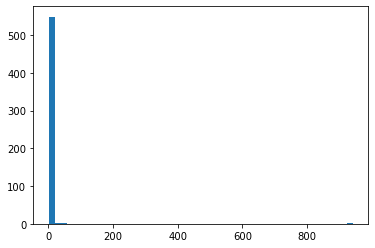

In [30]:
plt.hist(sorter_word_counts, bins=50)

### Plot 3 - Log Scale Histogram
Displaying at log scale will give us better plot to communicate this information because most of the words have low frequencies closer to 0. We will obtain a better graph.

(array([549.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  19.8,  38.6,  57.4,  76.2,  95. , 113.8, 132.6, 151.4,
        170.2, 189. , 207.8, 226.6, 245.4, 264.2, 283. , 301.8, 320.6,
        339.4, 358.2, 377. , 395.8, 414.6, 433.4, 452.2, 471. , 489.8,
        508.6, 527.4, 546.2, 565. , 583.8, 602.6, 621.4, 640.2, 659. ,
        677.8, 696.6, 715.4, 734.2, 753. , 771.8, 790.6, 809.4, 828.2,
        847. , 865.8, 884.6, 903.4, 922.2, 941. ]),
 <BarContainer object of 50 artists>)

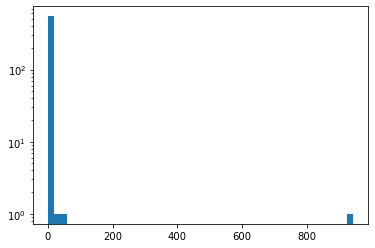

In [31]:
plt.hist(sorter_word_counts, bins=50, log=True)

In [32]:
len(txt_words)

1332

### WordCLoud

In [34]:
from wordcloud import WordCloud

word_cloud = WordCloud(width=1000, height= 500).generate_from_frequencies(word_counter)

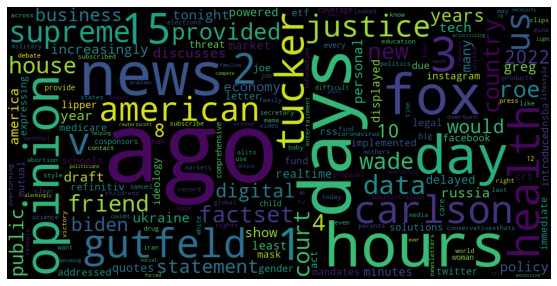

In [35]:
from matplotlib import rcParams

rcParams["figure.figsize"] = (10,5)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()